In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import pandas as pd


In [ ]:
path = '/content/drive/MyDrive/tweets.json'

with open(path, 'r') as f:
    data = json.load(f)

In [ ]:
df = pd.DataFrame(data['tweets'])

In [ ]:
df = df[['id','text']]

In [ ]:
path = '/content/drive/MyDrive/tweets1.json'

with open(path, 'r') as f:
    data = json.load(f)

In [ ]:
df1 = pd.DataFrame(data['tweets'])[['id','text']]

In [ ]:
df = pd.concat([df,df1])

In [ ]:
path = '/content/drive/MyDrive/twitter_data.json'

with open(path, 'r') as f:
    data = json.load(f)

In [ ]:
df2 = pd.DataFrame(data['tweets'])[['id','text']]

In [ ]:
df = pd.concat([df,df2])

In [ ]:
path = '/content/drive/MyDrive/twitter_data_1.json'

with open(path, 'r') as f:
    data = json.load(f)

In [ ]:
df3 = pd.DataFrame(data['tweets'])[['id','text']]

In [ ]:
df = pd.concat([df,df3])

In [ ]:
df.head()

,id,text
0,412455866806177792,16 Dec 1971-India got Victory in east Pakistan...
1,377329923788390400,Live blog: Nirbhaya gang rape: All 4 accused h...
2,411825670109396992,"Delhi: 11 months after Nirbhaya's case,No.of r..."
3,412612568306696192,"#crimePatrol, #CrimePatrolInsideStory, #SonyTV..."
4,373753778622570496,Damini|Nirbhaya case judgement gives licence t...


In [ ]:
len(df)

76

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
import string
import re

In [ ]:
data = df.text.tolist()

In [ ]:
data

['16 Dec 1971-India got Victory in east Pakistan formed Bangladesh. 16 Dec 2012- Delhi became rape capital Nirbhaya rape case. See difference.',
 'Live blog: Nirbhaya gang rape: All 4 accused held guilty: The four accused in the Dec 16, 2012 gang rape of a ... http://t.co/EHIgAXNzrn',
 "Delhi: 11 months after Nirbhaya's case,No.of rape cases in national capital doubled  -&gt; 1450 (till Nov.2013,706 cases in 2012)...!!",
 '#crimePatrol, #CrimePatrolInsideStory, #SonyTV, #InsideStory\nThe 2012 Delhi gang rape case involves a rape and... http://t.co/yDHQom2DPu',
 "Damini|Nirbhaya case judgement gives licence to minor's to rape, kill and get punished only fr 3 yrs.\n#shame",
 '@DeepakHPCC  \n\nOut of 706 rape cases filed in NDelhi in 2012,only ONE, the #Nirbhaya case, has ended in conviction.No justice 705 victims?',
 "Those following Delhi Dec 2012 rape case trial- know of any news source that doesn't use names like Nirbhaya, Amanat, etc?",
 '@HeadlinesToday What happened to Nirbhaya (De

# Basic Text Pre-processing

1. Remove links
2. Remove punctuations
3. Remove emojis
4. Remove usernames
5. Remove spaces and new line characters
6. Remove stopwords
7. Remove dates and numbers

In [ ]:
new_data = [re.sub(r'https?://\S+', '', sent) for sent in data]

In [ ]:
data_cleaned = [re.sub(r'[^\w\s]', '', sent) for sent in new_data]
data_cleaned[1]

'Live blog Nirbhaya gang rape All 4 accused held guilty The four accused in the Dec 16 2012 gang rape of a  '

In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002700-\U000027BF"  # dingbats
        "\U0001F900-\U0001F9FF"  # supplemental symbols & pictographs
        "\U0001FA70-\U0001FAFF"  # symbols for activities/objects
        "\U00002600-\U000026FF"  # misc symbols (☀, ⚽, etc.)
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub('', text)

In [ ]:
cleaned_data = [remove_emojis(sent) for sent in data_cleaned]
cleaned_data[1]

'Live blog Nirbhaya gang rape All 4 accused held guilty The four accused in the Dec 16 2012 gang rape of a  '

In [ ]:
data_new = [re.sub(r'@\S+', '', sent) for sent in cleaned_data]

In [ ]:
data_new = [re.sub(r'\d', '', sent) for sent in cleaned_data]

In [ ]:
data_final = [re.sub(r'\s+', ' ', sent) for sent in data_new] #removing extra spaces

In [ ]:
data_final

[' Dec India got Victory in east Pakistan formed Bangladesh Dec Delhi became rape capital Nirbhaya rape case See difference',
 'Live blog Nirbhaya gang rape All accused held guilty The four accused in the Dec gang rape of a ',
 'Delhi months after Nirbhayas caseNoof rape cases in national capital doubled gt till Nov cases in ',
 'crimePatrol CrimePatrolInsideStory SonyTV InsideStory The Delhi gang rape case involves a rape and ',
 'DaminiNirbhaya case judgement gives licence to minors to rape kill and get punished only fr yrs shame',
 'DeepakHPCC Out of rape cases filed in NDelhi in only ONE the Nirbhaya case has ended in convictionNo justice victims',
 'Those following Delhi Dec rape case trial know of any news source that doesnt use names like Nirbhaya Amanat etc',
 'HeadlinesToday What happened to Nirbhaya Delhi rape case amp accused No news nowno punishment alsoearned enough TRP in December ',
 'Via kiranks Out of rape cases filed in New Delhi in only ONE the Nirbhaya case has ende

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk import word_tokenize

In [ ]:
data_final = pd.Series(data_final)

In [ ]:
data_final = data_final.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data_final[5]

'DeepakHPCC Out rape cases filed NDelhi ONE Nirbhaya case ended convictionNo justice victims'

#Some More Cleaning

1. Remove duplicates
2. Remove tweets in foreign language



In [ ]:
data_final = data_final.drop_duplicates(keep='first')
data_final

,0
0,Dec India got Victory east Pakistan formed Ban...
1,Live blog Nirbhaya gang rape All accused held ...
2,Delhi months Nirbhayas caseNoof rape cases nat...
3,crimePatrol CrimePatrolInsideStory SonyTV Insi...
4,DaminiNirbhaya case judgement gives licence mi...
5,DeepakHPCC Out rape cases filed NDelhi ONE Nir...
6,Those following Delhi Dec rape case trial know...
7,HeadlinesToday What happened Nirbhaya Delhi ra...
8,Via kiranks Out rape cases filed New Delhi ONE...
9,Heart wrenching tale another Nirbhaya back Sti...


In [ ]:
data_final = data_final[~data_final.str.contains(r'[^\x00-\x7F]', regex=True)]
data_final

,0
0,Dec India got Victory east Pakistan formed Ban...
1,Live blog Nirbhaya gang rape All accused held ...
2,Delhi months Nirbhayas caseNoof rape cases nat...
3,crimePatrol CrimePatrolInsideStory SonyTV Insi...
4,DaminiNirbhaya case judgement gives licence mi...
5,DeepakHPCC Out rape cases filed NDelhi ONE Nir...
6,Those following Delhi Dec rape case trial know...
7,HeadlinesToday What happened Nirbhaya Delhi ra...
8,Via kiranks Out rape cases filed New Delhi ONE...
9,Heart wrenching tale another Nirbhaya back Sti...


# Visualizing Text Data

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wordcloud

In [ ]:
word_list =[]
for sent in data_final:
  word_list.extend(sent.split())
freq_dist = nltk.FreqDist(word_list)

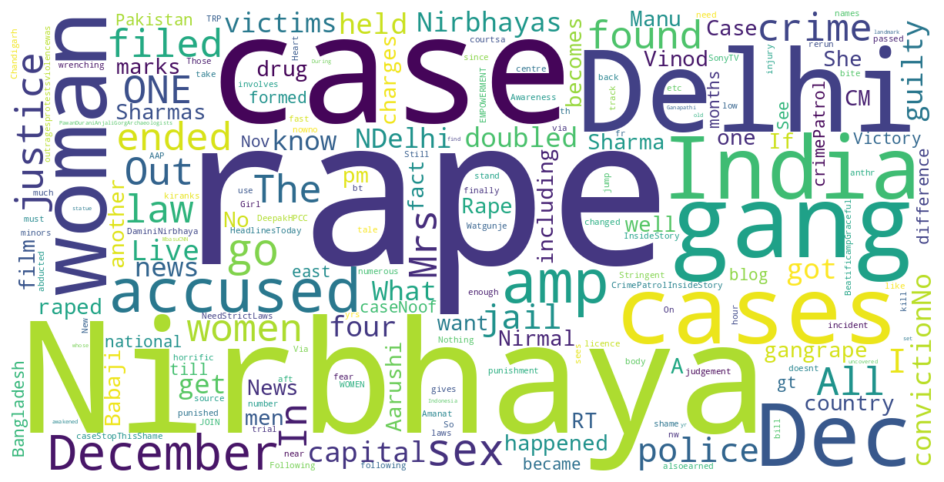

In [ ]:
wc = WordCloud(width=1200, height=600, background_color='white',
               stopwords=stopwords, collocations=False).generate_from_frequencies(freq_dist)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer(ngram_range=(1,2),lowercase=True, max_df=0.8, min_df=1,stop_words = 'english')

In [ ]:
import numpy as np

In [ ]:
X = vec.fit_transform(data_final)

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(2, 50)  # trying k = 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS value


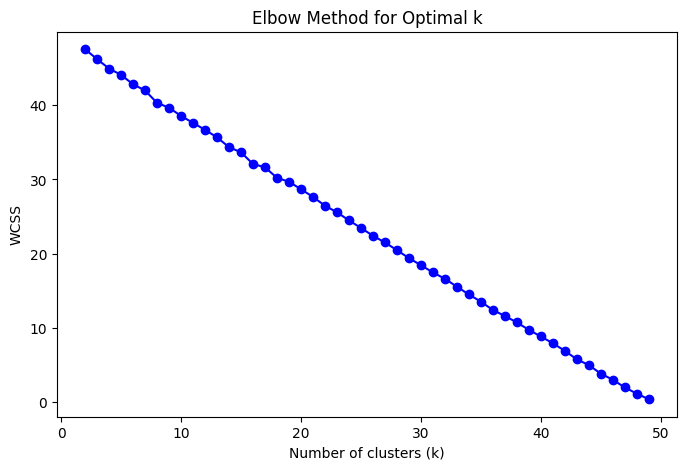

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', markersize=6)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.003
k=3, silhouette=0.010
k=4, silhouette=0.006
k=5, silhouette=0.006
k=6, silhouette=-0.004
k=7, silhouette=-0.004
k=8, silhouette=0.016
k=9, silhouette=0.015
k=10, silhouette=0.017
k=11, silhouette=0.008
k=12, silhouette=0.011
k=13, silhouette=0.011
k=14, silhouette=0.011
k=15, silhouette=0.011
k=16, silhouette=0.011
k=17, silhouette=0.011
k=18, silhouette=0.011
k=19, silhouette=0.010
k=20, silhouette=0.010
k=21, silhouette=0.010
k=22, silhouette=0.010
k=23, silhouette=0.011
k=24, silhouette=0.011
k=25, silhouette=0.011
k=26, silhouette=0.012
k=27, silhouette=0.012
k=28, silhouette=0.013
k=29, silhouette=0.012
k=30, silhouette=0.012
k=31, silhouette=0.013
k=32, silhouette=0.014
k=33, silhouette=0.014
k=34, silhouette=0.015
k=35, silhouette=0.014
k=36, silhouette=0.016
k=37, silhouette=0.015
k=38, silhouette=0.015
k=39, silhouette=0.015
k=40, silhouette=0.018
k=41, silhouette=0.016
k=42, silhouette=0.018
k=43, silhouette=0.022
k=44, silhouette=0.021
k=45, silhouette=

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

data_clusters = pd.DataFrame({'text': data_final, 'cluster': kmeans.labels_})
print(data_clusters)

                                                 text  cluster
0   Dec India got Victory east Pakistan formed Ban...        2
1   Live blog Nirbhaya gang rape All accused held ...        4
2   Delhi months Nirbhayas caseNoof rape cases nat...        3
3   crimePatrol CrimePatrolInsideStory SonyTV Insi...        4
4   DaminiNirbhaya case judgement gives licence mi...        3
5   DeepakHPCC Out rape cases filed NDelhi ONE Nir...        3
6   Those following Delhi Dec rape case trial know...        2
7   HeadlinesToday What happened Nirbhaya Delhi ra...        2
8   Via kiranks Out rape cases filed New Delhi ONE...        3
9   Heart wrenching tale another Nirbhaya back Sti...        3
10  WOMEN EMPOWERMENT need hour On th December hor...        2
11  Girl abducted gang raped Watgunje In near reru...        5
12  Awareness rape bill low Following Nirbhaya gan...        4
13  gang rape case She found injury marks includin...        4
14  Live All accused held guilty Nirbhaya gangrape...  

In [ ]:
import numpy as np

terms = vec.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(6):
    print(f"\nCluster {i}:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))


Cluster 0:
woman, india, vinod, sharma, sharmas, manu, awakened india, happened woman, woman landmark, awakened

Cluster 1:
police, sex, woman, drug, act, treat, violence, crime, nickelodeon saying, nickelodeon

Cluster 2:
women, rape, rape case, jail, delhi, nirbhaya, december, case, amp, dec

Cluster 3:
nirbhaya case, cases, case, nirbhaya, rape cases, rape, filed, ended, case ended, cases filed

Cluster 4:
gang rape, gang, rape, accused, nirbhaya, case, marks, rape case, guilty, dec gang

Cluster 5:
girl, raped, girl abducted, raped watgunje, near, gang raped, rerun, abducted gang, abducted, rerun nirbhaya


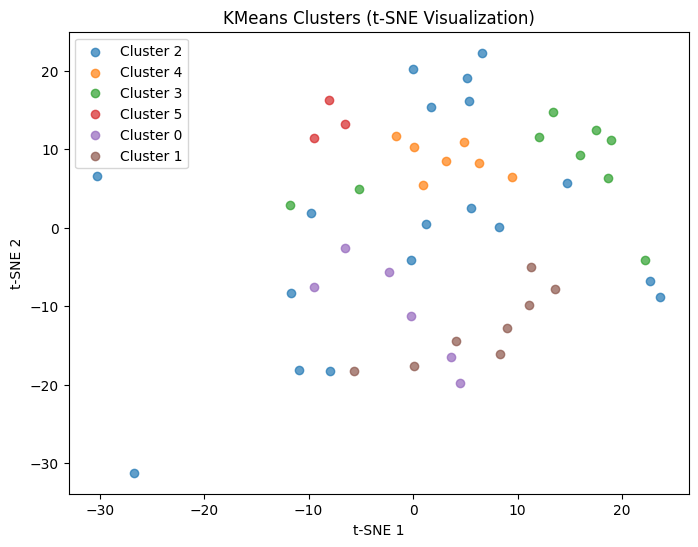

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_embedded = tsne.fit_transform(X.toarray())

df_viz = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_viz['cluster'] = kmeans.labels_

plt.figure(figsize=(8,6))
for cluster_id in df_viz['cluster'].unique():
    subset = df_viz[df_viz['cluster'] == cluster_id]
    plt.scatter(subset['x'], subset['y'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.legend()
plt.title('KMeans Clusters (t-SNE Visualization)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
